In [130]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [131]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [132]:
import pandas as pd

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

#Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Read the CSV and Perform Basic Data Cleaning

In [133]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [134]:
#Find unique target values
df["koi_disposition"].unique()



array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

# Select your features (columns)

In [135]:
# Set features. This will also be used as your x values. (I want to test all values as features)
selected_features = df
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
koi_disposition      6991 non-null object
koi_fpflag_nt        6991 non-null int64
koi_fpflag_ss        6991 non-null int64
koi_fpflag_co        6991 non-null int64
koi_fpflag_ec        6991 non-null int64
koi_period           6991 non-null float64
koi_period_err1      6991 non-null float64
koi_period_err2      6991 non-null float64
koi_time0bk          6991 non-null float64
koi_time0bk_err1     6991 non-null float64
koi_time0bk_err2     6991 non-null float64
koi_impact           6991 non-null float64
koi_impact_err1      6991 non-null float64
koi_impact_err2      6991 non-null float64
koi_duration         6991 non-null float64
koi_duration_err1    6991 non-null float64
koi_duration_err2    6991 non-null float64
koi_depth            6991 non-null float64
koi_depth_err1       6991 non-null float64
koi_depth_err2       6991 non-null float64
koi_prad             6991 non-null float64

# Create a Train Test Split

Use `koi_disposition` for the y values

In [136]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

#assign x and y values
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=115, stratify=y)

In [137]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2700,0,0,0,0,31.804760,0.000091,-0.000091,190.25413,0.00224,-0.00224,...,-128,4.235,0.143,-0.117,1.356,0.212,-0.259,287.62082,43.141647,13.178
21,0,0,0,0,4.280964,0.000006,-0.000006,171.89659,0.00115,-0.00115,...,-169,4.564,0.032,-0.168,0.831,0.207,-0.069,294.26581,49.314091,15.356
5040,0,1,1,0,0.829019,0.000002,-0.000002,131.46667,0.00401,-0.00401,...,-255,4.271,0.124,-0.186,1.328,0.408,-0.220,296.03485,45.490822,14.661
2795,0,0,1,0,1.387838,0.000006,-0.000006,132.11351,0.00318,-0.00318,...,-219,4.442,0.054,-0.216,1.044,0.335,-0.112,295.64212,48.773071,15.167
1765,0,0,0,0,14.383227,0.000086,-0.000086,140.57648,0.00530,-0.00530,...,-135,4.249,0.137,-0.112,1.291,0.216,-0.216,290.08276,50.863480,13.312


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [138]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [139]:
#Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
classifier.predict(X_test_scaled)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")
lr_score = classifier.score(X_test_scaled, y_test)

Training Data Score: 0.8485599847415601
Testing Data Score: 0.8295194508009154


C:\Users\hchapman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hchapman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [140]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)

print(f"Training Random Forest Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Random Forest Score: {rf.score(X_test_scaled, y_test)}")
rf_score = rf.score(X_test_scaled, y_test)

Training Random Forest Score: 1.0
Testing Random Forest Score: 0.8918764302059496


In [141]:
from sklearn.svm import SVC 
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
predictions = svc.predict(X_test)

print(f"Training Data Score: {svc.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svc.score(X_test_scaled, y_test)}")
svc_score = svc.score(X_test_scaled, y_test)

Training Data Score: 0.8498950982262063
Testing Data Score: 0.8329519450800915


# Train the Model



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [142]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [143]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

C:\Users\hchapman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.846, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.838, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.844, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.846, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.838, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.844, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.846, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.838, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.844, total=   0.2s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [144]:
print(grid.best_params_)
print(grid.best_score_)
grid_score = grid.best_score_

{'C': 10, 'gamma': 0.0001}
0.8706847224871257


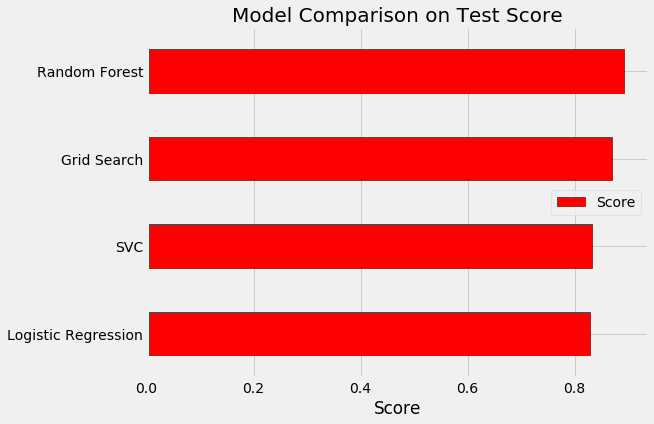

In [145]:
plt.style.use('fivethirtyeight')
figsize(8,6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'Random Forest',
                                           'SVC', 'Grid Search'],
                                 'Score': [lr_score, rf_score, svc_score, grid_score]})

# Horizontal bar chart of test mae
model_comparison.sort_values('Score', ascending = True).plot(x = 'model', y = 'Score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Score'); plt.xticks(size = 14)
plt.title('Model Comparison on Test Score', size = 20);

# Save the Model

In [146]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'harry_chapman.sav'
joblib.dump(rf, filename)

['harry_chapman.sav']

In [148]:
#Save model comparison image
plt.savefig('Model_Comparison.png')

<Figure size 576x432 with 0 Axes>